# Example 5.2 — Modeling Carbon-Film Resistor Degradation

**Author:** Justin Ryan  
**Created:** 2025-09-24  
**Updated:** 2025-10-07  
**Version:** 1.1  

---
## Problem Statement
This example involves modeling the performance degradation of carbon-film resistors over time under different 
stress conditions — specifically, three different temperature levels. The resistance of each resistor increases 
with time as it degrades. The resistance measurements over time at three temperature levels are provided in 
**Table 5.2** and **Table 5.3** (Meeker, Escobar, and Pascual, 2022).  

A resistor is considered to have **failed** when its resistance has increased by **5% or more** from its initial value.  
We are interested in the following:  

1. **Explore appropriate model forms** based on the observed degradation trends and estimate model param-
eters **using MLE**.
2. Evaluate the goodness of fit and **select the best degradation model of the resistor**.
3. Evaluate the goodness of fit and **select the the distribution that best models the resistor’s life (TTF)** under
**normal usage conditions (50 °C / 323 K)**.
---

## Solution
Three candidate degradation-model fits were evaluated:
1. SQRT–Arrhenius model using the full dataset **Concave Function**
2. Linear–Arrhenius model using only the non-transient data (t ≥ 1030 h) **Linear Function**
3. Exponential–Arrhenius model using only the non-transient data (t ≥ 1030 h) **Convex Function**

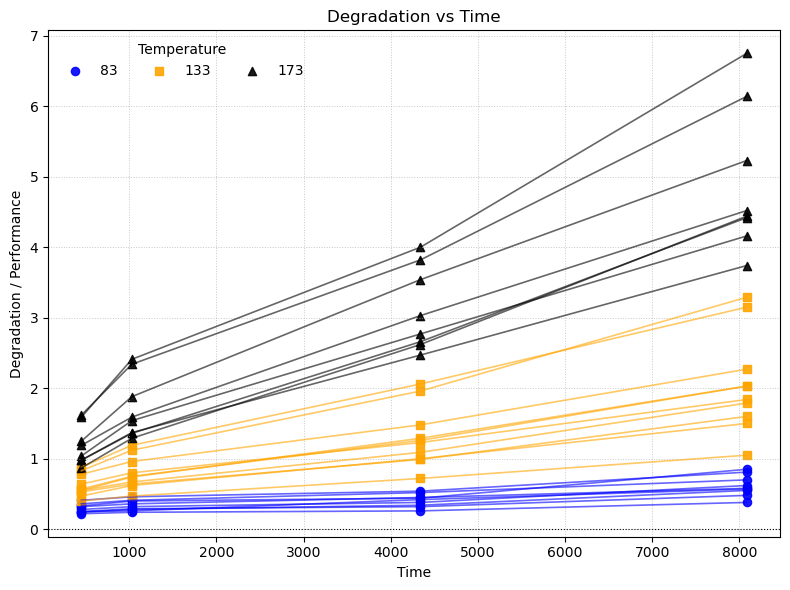

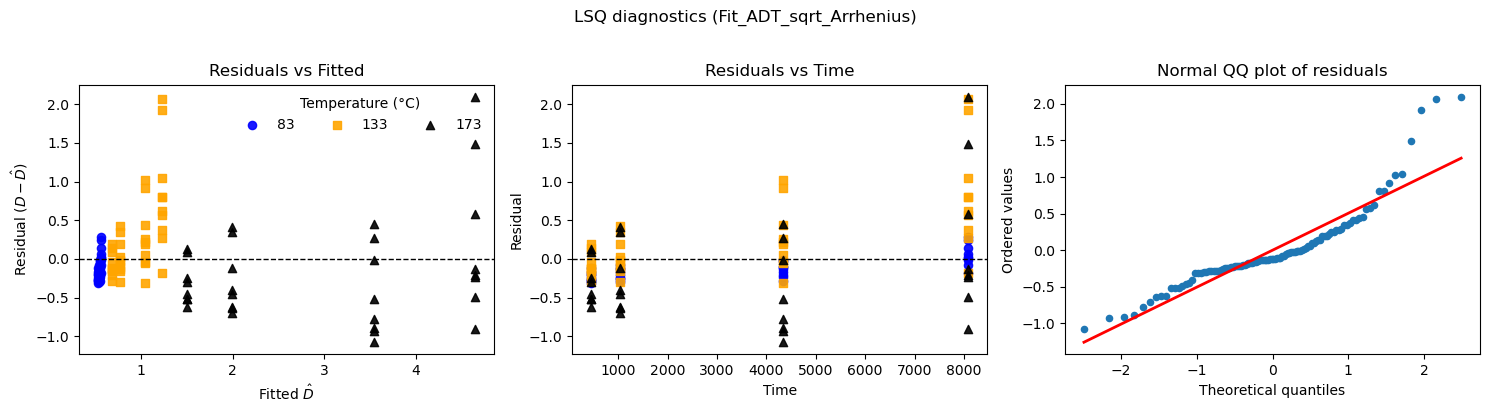

### Degradation / damage model

**Model form (damage scale)**

We model accumulated damage as a square-root function of (Arrhenius-scaled) time:

$$
\mathrm{AF}_T(T)
= \exp\!\left(
  \frac{E_a}{k_B}
  \left(
    \frac{1}{T_{\text{use}}} - \frac{1}{T}
  \right)
\right),
$$

$$
D(t, T)
= \gamma_{0} + \gamma_{1} \,\sqrt{\mathrm{AF}_T(T)\, t}.
$$

**Parameters**

- **$\gamma_{0}$** – baseline damage at $t=0$
- **$\gamma_{1}$** – scale factor for the square-root damage growth term
- **$E_{a}$** – Arrhenius activation energy (eV)
- **$T_{\text{use}}$** – use-level temperature (given, not fitted)

### MLE (multiplicative) (95% CI)

| Parameter | Estimate | SE | 95% CI |
|-----------|----------|----|--------------|
| g0 | 0.200679 | 187.8 | [-367.9, 368.3] |
| g1 | 0.00109547 | 0.2661 | [-0.5205, 0.5227] |
| Ea (eV) | 0.379363 | 4.839 | [-9.104, 9.863] |

**Noise log D:** 0.250866



Information criteria (MLE, 108 obs):
  AIC =      3.850
  BIC =     14.579


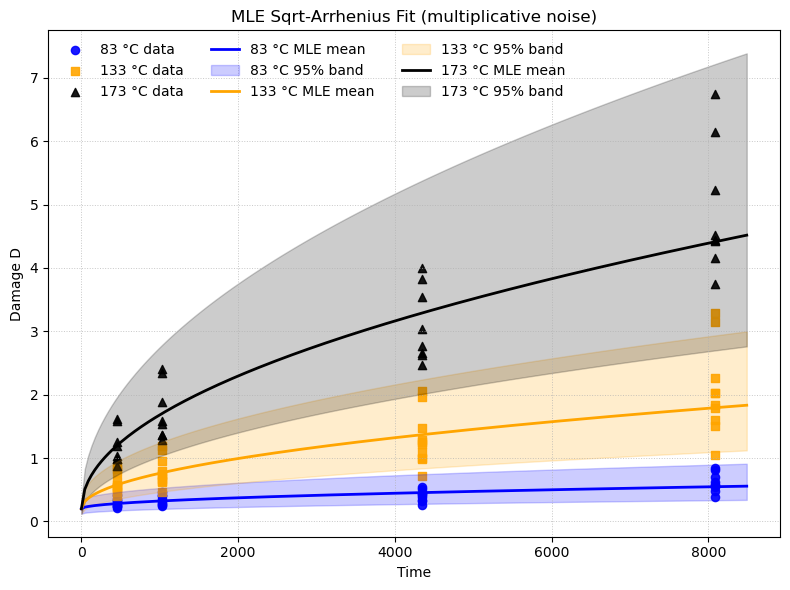

### Posterior summary for TTF at T=50 °C (Df=5.0)

- Mean life: 2.2249e+07 time units
- Median life: 1.9366e+07 time units
- 95% HDI: [4.4695e+06, 4.6564e+07] time units
- 95% ETI: [6.7899e+06, 5.4157e+07] time units

c:\users\leaat\reliability\reliability\Fitters.py:440: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat(


Results from Fit_Everything:
Analysis method: MLE
Failures / Right censored: 8000/0 (0% right censored) 

   Distribution       Alpha    Beta       Gamma     Alpha 1  Beta 1     Alpha 2  Beta 2 Proportion 1 DS          Mu       Sigma      Lambda  Log-likelihood   AICc    BIC       AD optimizer
   Lognormal_2P                                                                                             16.7792    0.529013                     -140491 280987 281001 0.486283       TNC
   Lognormal_3P                               0                                                             16.7792    0.529013                     -140491 280989 281010 0.486283  L-BFGS-B
       Gamma_3P  7.1418e+06 2.72231  2.8068e+06                                                                                                     -140537 281079 281100  6.76967       TNC
 Loglogistic_3P 1.81766e+07 3.07918 1.16109e+06                                                                                           

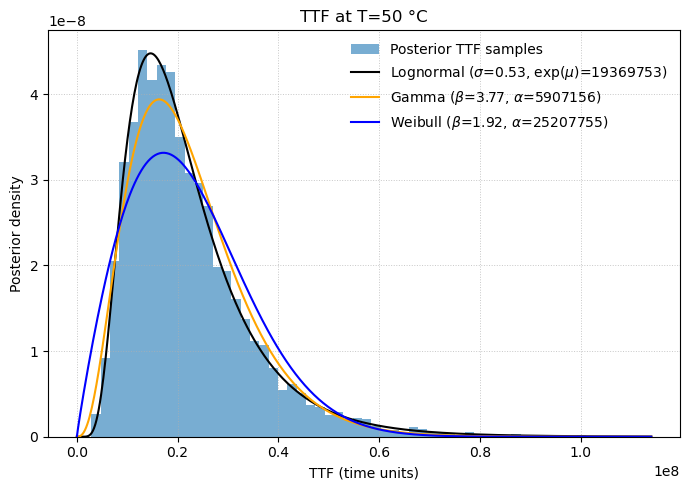

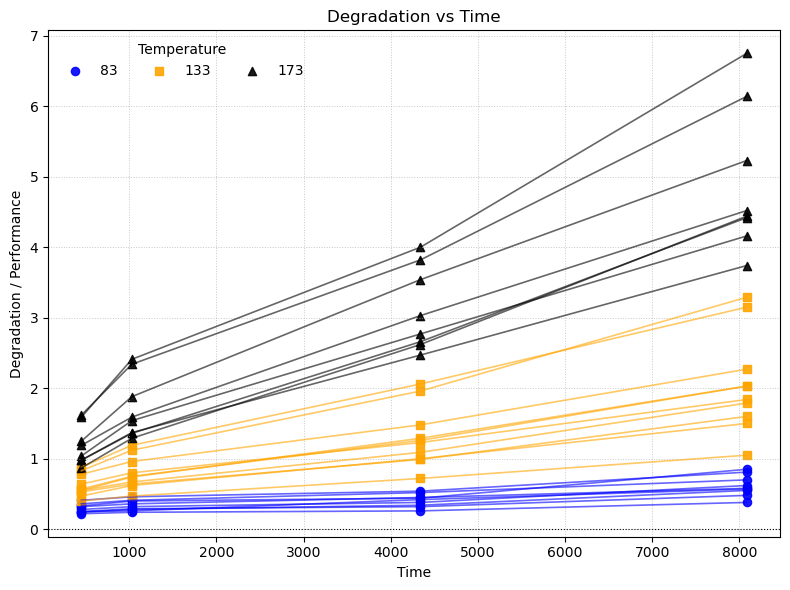

### Posterior summary for TTF at T=50 °C (Df=5.0)

- Mean life: 2.2249e+07 Hours
- Median life: 1.9366e+07 Hours
- 95% HDI: [4.4695e+06, 4.6564e+07] Hours
- 95% ETI: [6.7899e+06, 5.4157e+07] Hours

c:\users\leaat\reliability\reliability\Fitters.py:440: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat(


Results from Fit_Everything:
Analysis method: MLE
Failures / Right censored: 8000/0 (0% right censored) 

   Distribution       Alpha    Beta       Gamma     Alpha 1  Beta 1     Alpha 2  Beta 2 Proportion 1 DS          Mu       Sigma      Lambda  Log-likelihood   AICc    BIC       AD optimizer
   Lognormal_2P                                                                                             16.7792    0.529013                     -140491 280987 281001 0.486283       TNC
   Lognormal_3P                               0                                                             16.7792    0.529013                     -140491 280989 281010 0.486283  L-BFGS-B
       Gamma_3P  7.1418e+06 2.72231  2.8068e+06                                                                                                     -140537 281079 281100  6.76967       TNC
 Loglogistic_3P 1.81766e+07 3.07918 1.16109e+06                                                                                           

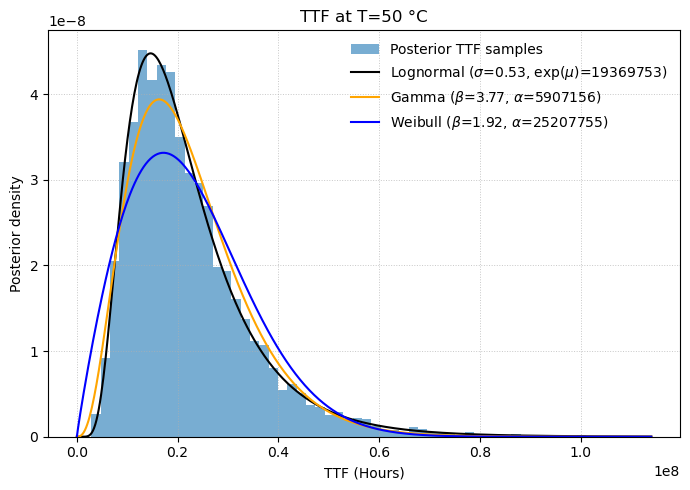

In [1]:
# EXAMPLE 5.2 - SQRT_Arrhenius degradation model
import pandas as pd
import sys 
sys.path.append("C:/Users/leaat/Dropbox/University of Maryland/ENRE648 - PPoF Chap Review - Degradation Analysis/ADT Fitters Module")
df = pd.read_csv("C:/Users/leaat/Dropbox/University of Maryland/ENRE648 - PPoF Chap Review - Degradation Analysis/Modarres Chapter Validation/Data/Example_5.2_resistor_data.csv")

# --- Tidy (long) format for plotting ---
time_cols = ['h_452', 'h_1030', 'h_4341', 'h_8084']
time_map = {'h_452': 452, 'h_1030': 1030, 'h_4341': 4341, 'h_8084': 8084}

long = df.melt(id_vars=['Unit', 'Temperature_C'], value_vars=time_cols, var_name='time_label', value_name='pct_increase').dropna(subset=['pct_increase'])

long['hours'] = long['time_label'].map(time_map).astype(int)
t_time = long["hours"].to_numpy(float)
T_acc_C = long["Temperature_C"].to_numpy(float)
D_obs = long["pct_increase"].to_numpy(float)
T_degC = long["Temperature_C"].to_numpy(float)
unit = long["Unit"].to_numpy()
T_use = 50   # deg C
Df=5

from ADT_fitters import Fit_ADT_sqrt_Arrhenius
fit_5_2_sqrt = Fit_ADT_sqrt_Arrhenius(
    degradation=D_obs,
    stress=T_acc_C,
    time=t_time,
    unit = unit,
    stress_use=T_use,
    Df=Df,
    CI=0.95,
    method="MLE",
    noise="multiplicative",
    show_data_plot=True,
    show_LSQ_diagnostics=True,
    show_noise_bounds=True,
    show_use_TTF_dist=True,
    print_results=True)
fit_5_2_sqrt.plot_data(save = "5.2_data.png")
fit_5_2_sqrt._plot_fit_MLE(save = "5.2_Sqrt_MLE_Fit.png")
fit_5_2_sqrt._plot_use_TTF_distribution_MLE(unit_label="Hours", save = "5.2_Sqrt_MLE_TTF.png")

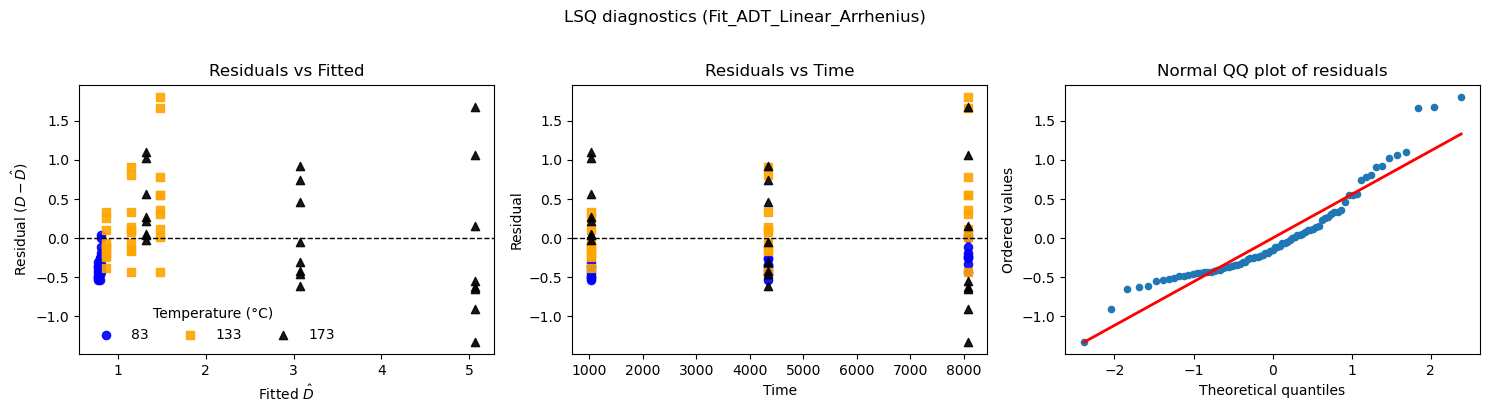

### Degradation / damage model

**Model form (damage scale)**

Damage is linear in (Arrhenius-scaled) time:

$$
\mathrm{AF}_T(T)
= \exp\!\left(
  \frac{E_a}{k_B}
  \left(
    \frac{1}{T_{\text{use}}} - \frac{1}{T}
  \right)
\right),
$$

$$
D(t, T)
= \gamma_{0} + \gamma_{1} \,\mathrm{AF}_T(T)\, t.
$$

**Parameters**

- **$\gamma_{0}$** – baseline damage at $t=0$ 
- **$\gamma_{1}$** – linear degradation rate (per unit Arrhenius-scaled time)  
- **$E_{a}$** – Arrhenius activation energy (eV)  
- **$T_{\text{use}}$** – use-level temperature (fixed, not fitted)

### MLE (multiplicative) (95% CI)

| Parameter | Estimate | SE | 95% CI |
|-----------|----------|----|--------------|
| a | 0.765567 | 1 | [-1.194, 2.726] |
| b | 5.77656e-07 | 5.414e-06 | [-1.003e-05, 1.119e-05] |
| Ea (eV) | 0.7 | 1 | [-1.26, 2.66] |

**Noise log D:** 0.583976



Information criteria (MLE, 81 obs):
  AIC =    140.126
  BIC =    149.703


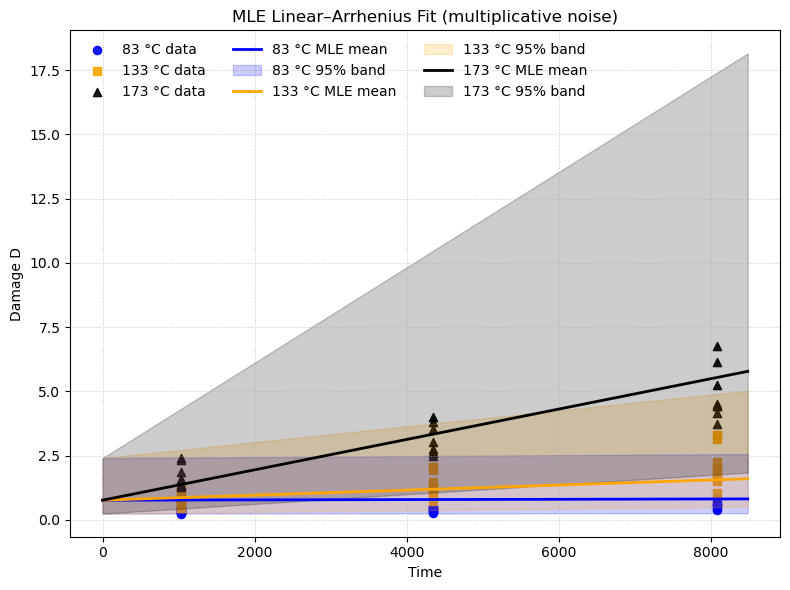

### Posterior summary for TTF at T=50 °C (Df=5.0)

- Mean life: 9.1072e+06 time units
- Median life: 7.4174e+06 time units
- 95% HDI: [1.1804e+05, 2.1837e+07] time units
- 95% ETI: [1.4245e+06, 2.6541e+07] time units

c:\users\leaat\reliability\reliability\Fitters.py:440: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat(


Results from Fit_Everything:
Analysis method: MLE
Failures / Right censored: 7996/0 (0% right censored) 

   Distribution       Alpha    Beta   Gamma     Alpha 1  Beta 1     Alpha 2  Beta 2 Proportion 1 DS          Mu       Sigma      Lambda  Log-likelihood   AICc    BIC      AD optimizer
Weibull_Mixture                             7.95261e+06 1.91188 1.51324e+07 1.58532     0.683095                                                -134975 269959 269994 2.90469       TNC
       Gamma_2P 4.20492e+06 2.16693                                                                                                             -135013 270031 270045 9.96815       TNC
       Gamma_3P 4.20973e+06 2.16335 4691.38                                                                                                     -135013 270033 270054 9.91894       TNC
 Loglogistic_2P 7.32444e+06 2.41548                                                                                                             -135057 270118

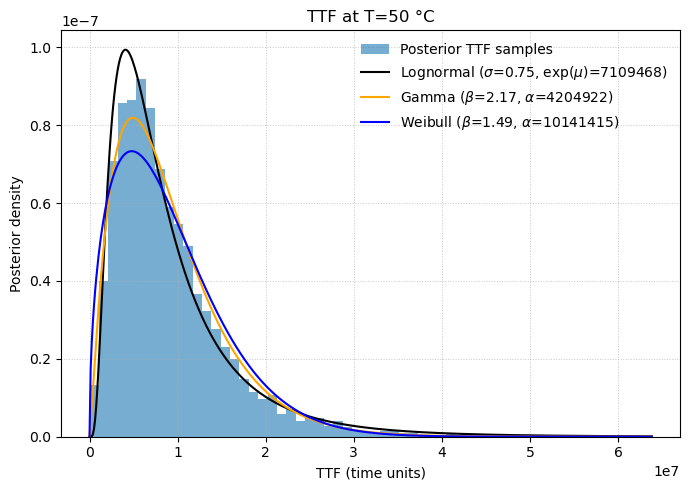

In [2]:
# EXAMPLE 5.2 - Linear_Arrhenius degradation model
import pandas as pd
import sys 
sys.path.append("C:/Users/leaat/Dropbox/University of Maryland/ENRE648 - PPoF Chap Review - Degradation Analysis/ADT Fitters Module")
df = pd.read_csv("C:/Users/leaat/Dropbox/University of Maryland/ENRE648 - PPoF Chap Review - Degradation Analysis/Modarres Chapter Validation/Data/Example_5.2_resistor_data.csv")

# --- Tidy (long) format for plotting using only non transient data from 1030 h---
time_cols = ['h_1030', 'h_4341', 'h_8084']
time_map = {'h_1030': 1030, 'h_4341': 4341, 'h_8084': 8084}

long = df.melt(id_vars=['Unit', 'Temperature_C'], value_vars=time_cols, var_name='time_label', value_name='pct_increase').dropna(subset=['pct_increase'])

long['hours'] = long['time_label'].map(time_map).astype(int)
t_time = long["hours"].to_numpy(float)
T_acc_C = long["Temperature_C"].to_numpy(float)
D_obs = long["pct_increase"].to_numpy(float)
T_degC = long["Temperature_C"].to_numpy(float)
unit = long["Unit"].to_numpy()
T_use = 50   # deg C
Df=5

from ADT_fitters import Fit_ADT_Linear_Arrhenius
fit_5_2_linear = Fit_ADT_Linear_Arrhenius(
    degradation=D_obs,
    stress=T_acc_C,
    time=t_time,
    unit = unit,
    stress_use=T_use,
    Df=Df,
    CI=0.95,
    method="MLE",
    noise="Multiplicative",
    show_data_plot=False,
    show_LSQ_diagnostics=True,
    show_noise_bounds=True,
    show_use_TTF_dist=True,
    print_results=True)

fit_5_2_linear._plot_fit_MLE(save = "5.2_Linear_MLE_Fit.png")

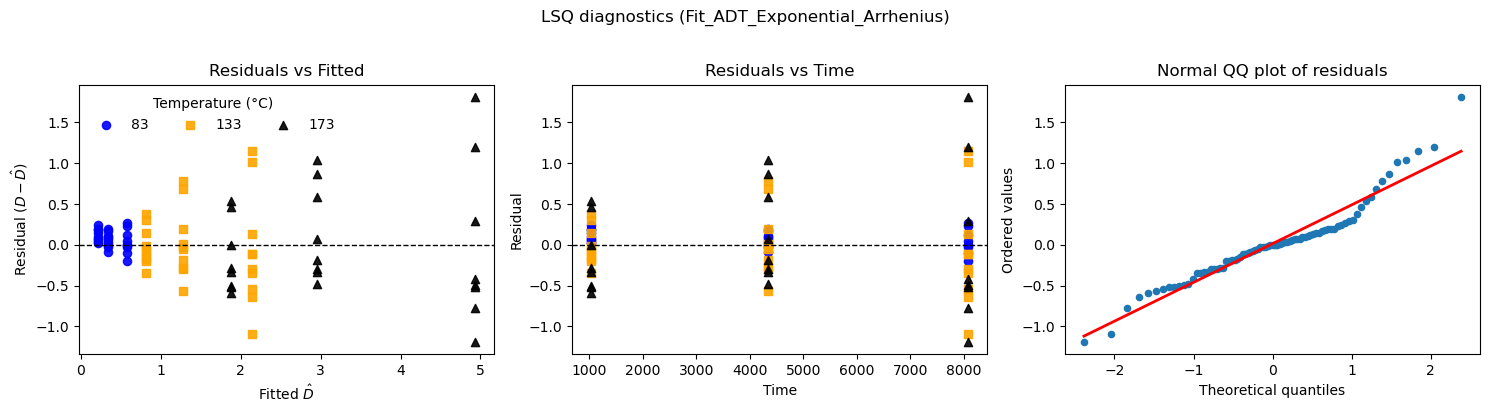

### Degradation / Damage Model

**Model form**

The degradation at time $t$ under stress temperature $T$ is assumed to follow an 
exponential-in-time law, accelerated by an Arrhenius temperature factor:

$$
D(t, T)
= b\,\exp(a\,t)\,
  \exp\!\left(
      \frac{E_a}{k_B}
      \left(
        \frac{1}{T_{\text{use}}} - \frac{1}{T}
      \right)
  \right).
$$

**Parameters**

- **$b$** – initial damage scale at $t=0$ 
- **$a$** – exponential time growth rate (1/time)  
- **$E_{a}$** – Arrhenius activation energy (eV)  
- **$T_{\text{use}}$** – use-level temperature (fixed, not fitted)

### MLE (multiplicative) (90% CI)

| Parameter | Estimate | SE | 90% CI |
|-----------|----------|----|--------------|
| b | 0.0644319 | 1 | [-1.58, 1.709] |
| a | 0.000136892 | 1 | [-1.645, 1.645] |
| Ea (eV) | 0.326444 | 1 | [-1.318, 1.971] |

**Noise log D:** 0.491089



Information criteria (MLE, 81 obs):
  AIC =     88.138
  BIC =     97.715


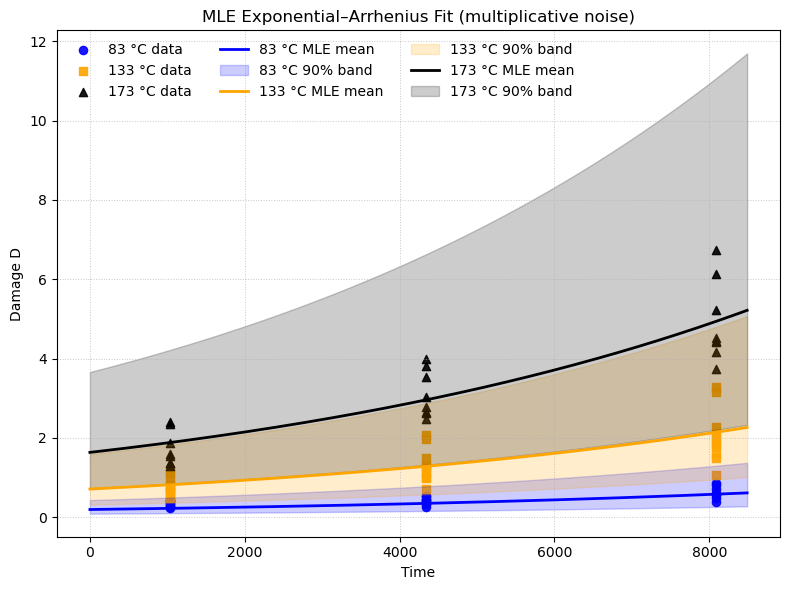

### Posterior summary for TTF at T=50 °C (Df=5.0)

- Mean life: 3.1871e+04 time units
- Median life: 3.1850e+04 time units
- 90% HDI: [2.5992e+04, 3.7852e+04] time units
- 90% ETI: [2.5927e+04, 3.7804e+04] time units

c:\users\leaat\reliability\reliability\Fitters.py:440: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat(


Results from Fit_Everything:
Analysis method: MLE
Failures / Right censored: 8000/0 (0% right censored) 

   Distribution   Alpha    Beta   Gamma Alpha 1  Beta 1 Alpha 2  Beta 2 Proportion 1 DS      Mu    Sigma      Lambda  Log-likelihood   AICc    BIC       AD optimizer
      Normal_2P                                                                         31870.7  3625.79                    -76918.1 153840 153854 0.262938       TNC
     Weibull_3P   14616 4.05638 18600.4                                                                                     -76938.9 153884 153905  3.10525       TNC
Weibull_Mixture                         35601.1 10.5962 31954.3 12.2116     0.365501                                        -76972.6 153955 153990  3.88261       TNC
   Lognormal_2P                                                                         10.3628 0.115782                    -77005.8 154016 154030  12.1313       TNC
   Lognormal_3P                       0                         

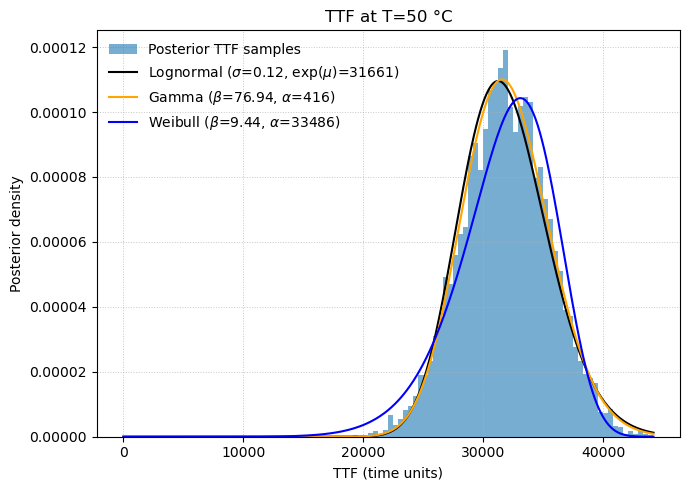

In [3]:
# EXAMPLE 5.2 - Exponential_Arrhenius degradation model
import pandas as pd
import sys 
sys.path.append("C:/Users/leaat/Dropbox/University of Maryland/ENRE648 - PPoF Chap Review - Degradation Analysis/ADT Fitters Module")
df = pd.read_csv("C:/Users/leaat/Dropbox/University of Maryland/ENRE648 - PPoF Chap Review - Degradation Analysis/Modarres Chapter Validation/Data/Example_5.2_resistor_data.csv")

# --- Tidy (long) format for plotting using only non transient data from 1030 h---
time_cols = ['h_1030', 'h_4341', 'h_8084']
time_map = {'h_1030': 1030, 'h_4341': 4341, 'h_8084': 8084}

long = df.melt(id_vars=['Unit', 'Temperature_C'], value_vars=time_cols, var_name='time_label', value_name='pct_increase').dropna(subset=['pct_increase'])

long['hours'] = long['time_label'].map(time_map).astype(int)
t_time = long["hours"].to_numpy(float)
T_acc_C = long["Temperature_C"].to_numpy(float)
D_obs = long["pct_increase"].to_numpy(float)
T_degC = long["Temperature_C"].to_numpy(float)
unit = long["Unit"].to_numpy()
T_use = 50   # deg C
Df=5

from ADT_fitters import Fit_ADT_Exponential_Arrhenius
fit_5_1_Exp = Fit_ADT_Exponential_Arrhenius(
    degradation=D_obs,
    stress=T_acc_C,
    time=t_time,
    unit = unit,
    stress_use=T_use,
    Df=Df,
    CI=0.90,
    method="MLE",
    noise="multiplicative",
    show_data_plot=False,
    show_LSQ_diagnostics=True,
    show_noise_bounds=True,
    show_use_TTF_dist=True,
    print_results=True)

fit_5_1_Exp._plot_fit_MLE(save = "5.2_Exp_MLE_Fit.png")